# Understanding the Data

In [280]:
import numpy as np
import pandas as pd

In [281]:
#importing the dataset
data = pd.read_csv('Students Social Media Addiction.csv')

In [282]:
#checking the shape of the dataset
data.shape

(705, 13)

In [283]:
#viewing the first 5 rows and random 5 rows of the dataset
data.head()
data.sample(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
64,65,23,Male,Graduate,Slovakia,2.3,LinkedIn,No,7.4,8,In Relationship,1,3
56,57,18,Male,High School,Trinidad,5.6,TikTok,Yes,5.2,5,Single,4,8
251,252,22,Male,Graduate,Russia,4.6,VKontakte,No,7.5,7,In Relationship,2,5
21,22,23,Female,Graduate,Switzerland,2.5,LinkedIn,No,7.3,8,In Relationship,1,4
656,657,19,Female,Undergraduate,Denmark,4.6,Twitter,No,7.3,7,In Relationship,2,5


In [284]:
#getting the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [285]:
#checking for missing values
data.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [286]:
#getting the statistical measures about the dataset
data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


The data belongs to the age group 18 to 24 years 

In [287]:
#checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [288]:
#finding the correlation between the columns
data_corr = data[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night','Mental_Health_Score']]
print(data_corr.corr())

                            Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
Age                    1.000000              -0.113682               0.125265   
Avg_Daily_Usage_Hours -0.113682               1.000000              -0.790582   
Sleep_Hours_Per_Night  0.125265              -0.790582               1.000000   
Mental_Health_Score    0.160278              -0.801058               0.707439   

                       Mental_Health_Score  
Age                               0.160278  
Avg_Daily_Usage_Hours            -0.801058  
Sleep_Hours_Per_Night             0.707439  
Mental_Health_Score               1.000000  


# EDA

A. Univariate Analysis : Performing the analysis in each column individually to find the types of values, need for transformation or not and to find the outliers.  

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

1. Categorical Data

In [290]:
data_categorial = data.select_dtypes(include=['object'])
print(data_categorial.nunique())

Gender                            2
Academic_Level                    3
Country                         110
Most_Used_Platform               12
Affects_Academic_Performance      2
Relationship_Status               3
dtype: int64


C:\Users\kejri\AppData\Local\Temp\ipykernel_4620\3828253984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Most_Used_Platform'], palette='viridis', order=data['Most_Used_Platform'].value_counts().index)


<Axes: xlabel='count', ylabel='Most_Used_Platform'>

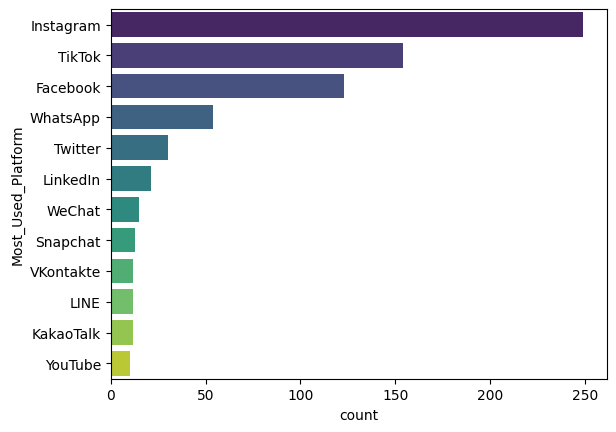

In [291]:
#Counterplot for Most Used Platform
sns.countplot(data['Most_Used_Platform'], palette='viridis', order=data['Most_Used_Platform'].value_counts().index)

<Axes: title={'center': 'Relationship Status Distribution'}, ylabel='count'>

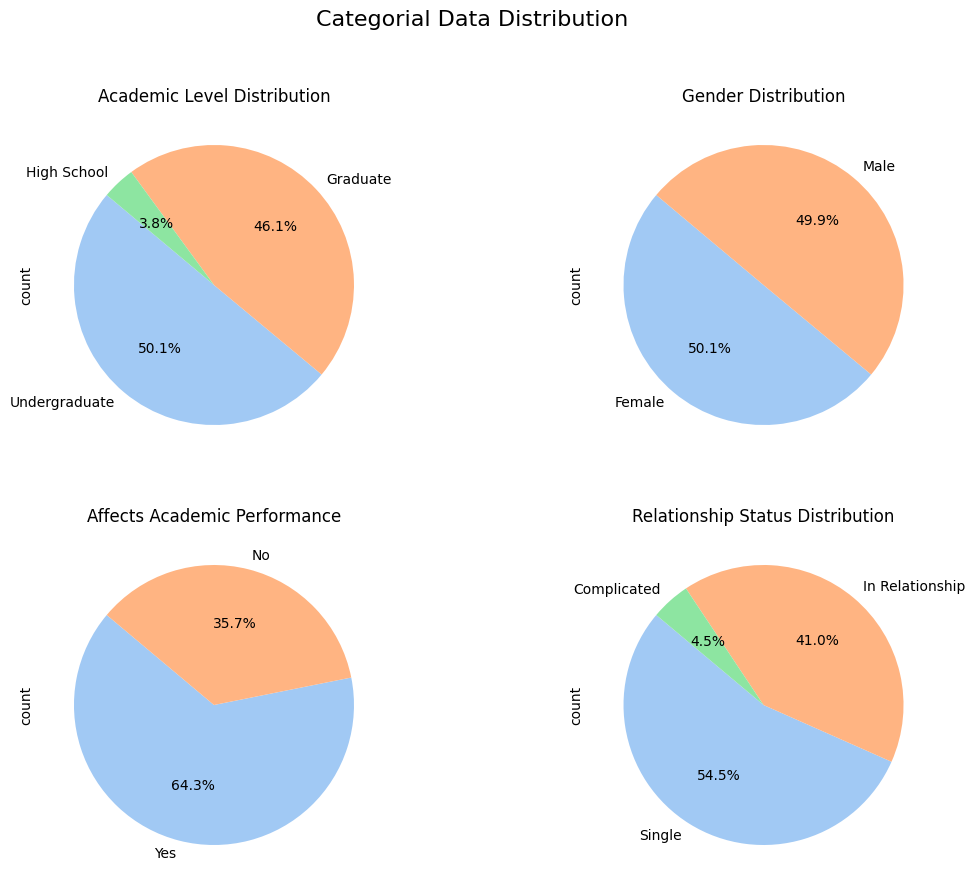

In [292]:
#Pie chart for Academic Level Distribution
fig = plt.figure(figsize=(13, 10))
axes = fig.subplots(2, 2)
plt.suptitle('Categorial Data Distribution', fontsize=16)

axes[0,0].set_title('Academic Level Distribution')
data['Academic_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), ax=axes[0,0])

axes[0,1].set_title('Gender Distribution')
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), ax=axes[0,1])

axes[1,0].set_title('Affects Academic Performance')
data['Affects_Academic_Performance'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), ax=axes[1,0])

axes[1,1].set_title('Relationship Status Distribution')
data['Relationship_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), ax=axes[1,1])

2. Numerical Data

In [293]:
data_categorial = data.select_dtypes(include=['int', 'float'])
print(data_categorial.nunique())

Student_ID                     705
Age                              7
Avg_Daily_Usage_Hours           67
Sleep_Hours_Per_Night           59
Mental_Health_Score              6
Conflicts_Over_Social_Media      6
Addicted_Score                   8
dtype: int64


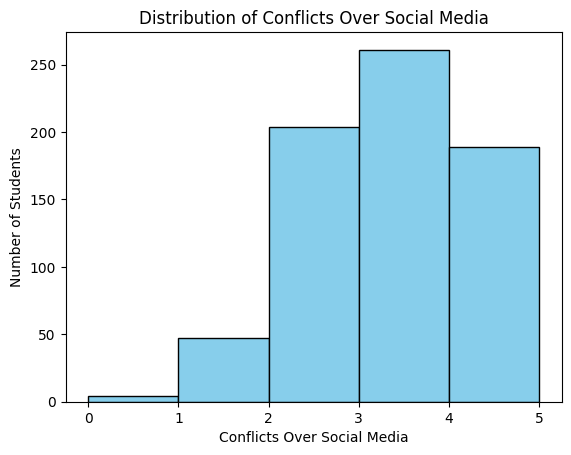

In [294]:
#Histogram for Conflicts over social media Distribution
plt.hist(data['Conflicts_Over_Social_Media'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Conflicts Over Social Media')
plt.ylabel('Number of Students')
plt.title('Distribution of Conflicts Over Social Media')
plt.show()

C:\Users\kejri\AppData\Local\Temp\ipykernel_4620\1454501297.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sleep_Hours_Per_Night'], kde=True, bins=7, color='Green')


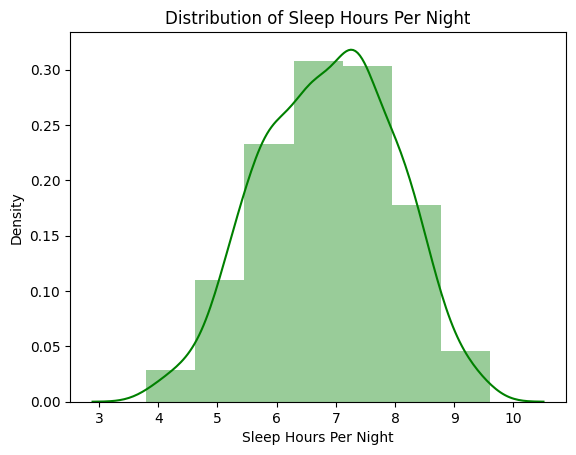

In [295]:
#DistPlot for Sleep Hours Distribution
sns.distplot(data['Sleep_Hours_Per_Night'], kde=True, bins=7, color='Green')
plt.title('Distribution of Sleep Hours Per Night')
plt.xlabel('Sleep Hours Per Night')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='Addicted_Score'>

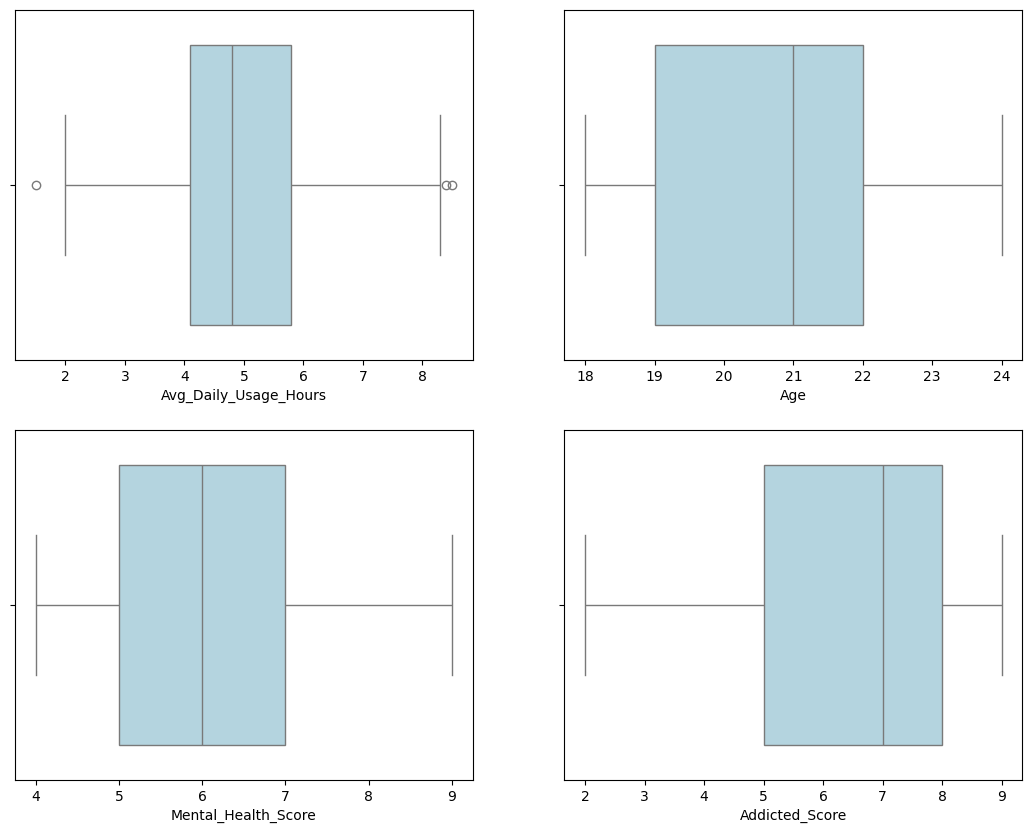

In [296]:
#Boxplot for Avg Daily Usage Hours
fig= plt.figure(figsize=(13,10))
axes = fig.subplots(2,2)
sns.boxplot(x=data['Avg_Daily_Usage_Hours'], color='lightblue', ax=axes[0,0])
sns.boxplot(x=data['Age'], color='lightblue', ax=axes[0,1])
sns.boxplot(x=data['Mental_Health_Score'], color='lightblue', ax=axes[1,0])
sns.boxplot(x=data['Addicted_Score'], color='lightblue', ax=axes[1,1])

B. Bivariate Analysis : Performing the analysis between the columns to find the trends, correlation and hidden patterns.

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

1. Plotting the relations between the numerical and numerical Data

<Axes: xlabel='Mental_Health_Score', ylabel='Addicted_Score'>

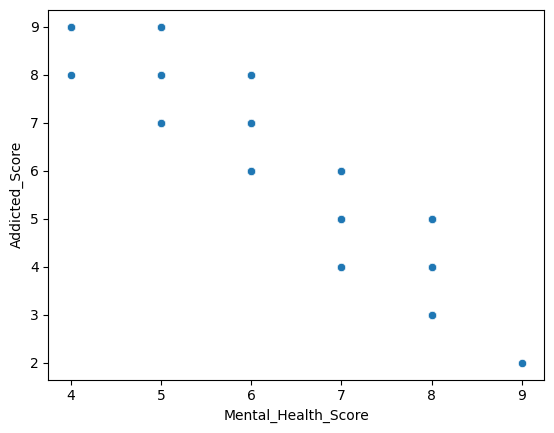

In [298]:
sns.scatterplot(x= data['Mental_Health_Score'], y = data['Addicted_Score'])

This plot tells us the less the person is addicted to the social media will have better mental health score.

C:\Users\kejri\AppData\Local\Temp\ipykernel_4620\541532407.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x= data['Avg_Daily_Usage_Hours'], y = data['Addicted_Score'], palette='deep')


<Axes: xlabel='Avg_Daily_Usage_Hours', ylabel='Addicted_Score'>

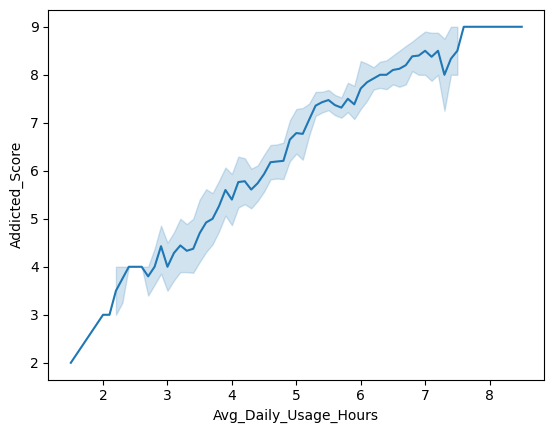

In [299]:
sns.lineplot(x= data['Avg_Daily_Usage_Hours'], y = data['Addicted_Score'], palette='deep')

2. Plotting the relations between the numerical and categorical Data

C:\Users\kejri\AppData\Local\Temp\ipykernel_4620\294473968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Gender'], y=data['Avg_Daily_Usage_Hours'], palette='Set2', ax=axes[0,0])
C:\Users\kejri\AppData\Local\Temp\ipykernel_4620\294473968.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Gender'], y= data['Mental_Health_Score'], palette='Set2', ax=axes[0,1])
C:\Users\kejri\AppData\Local\Temp\ipykernel_4620\294473968.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Gender'], y= data['Conflicts_Over_Social_Medi

<Axes: xlabel='Gender', ylabel='Addicted_Score'>

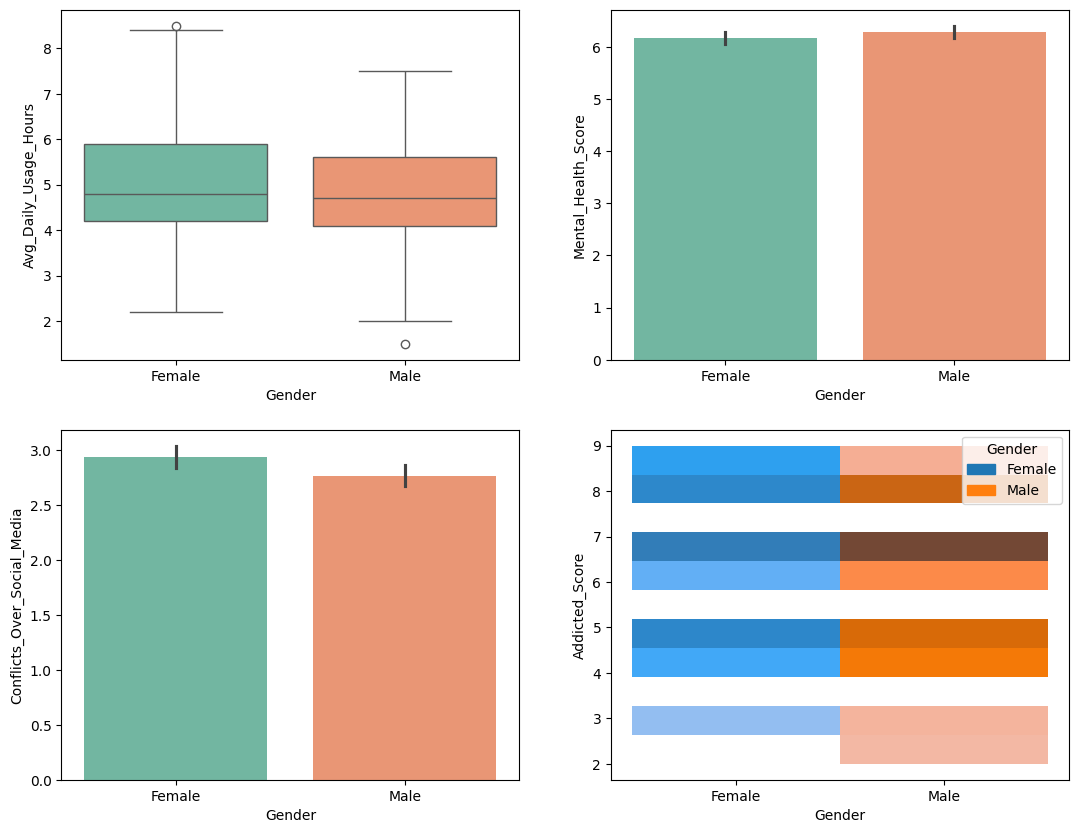

In [300]:
fig = plt.figure(figsize=(13,10))
axes = fig.subplots(2,2)
sns.boxplot(x=data['Gender'], y=data['Avg_Daily_Usage_Hours'], palette='Set2', ax=axes[0,0])
sns.barplot(x=data['Gender'], y= data['Mental_Health_Score'], palette='Set2', ax=axes[0,1])
sns.barplot(x=data['Gender'], y= data['Conflicts_Over_Social_Media'], palette='Set2', ax=axes[1,0])
sns.histplot(x=data['Gender'], y=data['Addicted_Score'], hue=data['Gender'], ax=axes[1,1])

These Plots are showing that females are using social more than males due to which there mental health is affected more than the males and hence they have more conflicts in the social media than the males. Eventually it suggests that females are more addicted to the social media than the males are.

C:\Users\kejri\AppData\Local\Temp\ipykernel_4620\2154049619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Relationship_Status'], y=data['Mental_Health_Score'], palette='Set2', ax=axes[0])
C:\Users\kejri\AppData\Local\Temp\ipykernel_4620\2154049619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Relationship_Status'], y=data['Conflicts_Over_Social_Media'], palette='Set2', ax=axes[1])


<Axes: xlabel='Relationship_Status', ylabel='Conflicts_Over_Social_Media'>

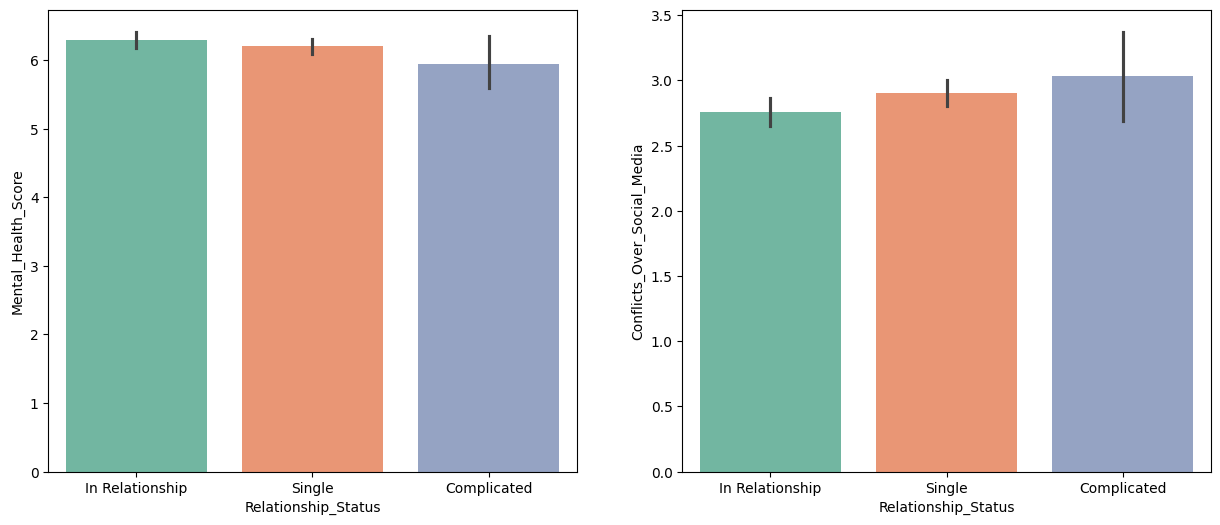

In [301]:
fig = plt.figure(figsize=(15,6))
axes = fig.subplots(1,2)
sns.barplot(x=data['Relationship_Status'], y=data['Mental_Health_Score'], palette='Set2', ax=axes[0])
sns.barplot(x=data['Relationship_Status'], y=data['Conflicts_Over_Social_Media'], palette='Set2', ax=axes[1])

From these plots we can understand that if the person is in the relationship will have the better mental health and hence will have less conflicts over social media while if the person have the complicated relations than will have lower mental health and will have more conflicts over the social media.

3. Plotting the relations between the categorical and categorical Data

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Avg_Daily_Usage_Hours'),
  Text(2.5, 0, 'Sleep_Hours_Per_Night'),
  Text(3.5, 0, 'Mental_Health_Score')])

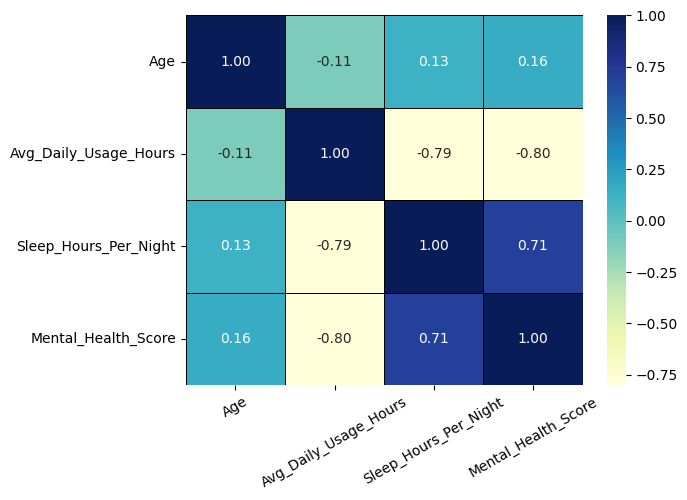

In [302]:
sns.heatmap(data=data_corr.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='black', cbar=True)
plt.xticks(rotation=30)
# sns.clustermap(data=data_corr.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='black', cbar=True, figsize=(8,8))
# plt.xticks(rotation=30)

We can also use the pandas profiller to automatically do the EDA and show in the html format

In [303]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data, title="Students Social Media Addiction Data Profiling Report")
# profile.to_file("students_social_media_addiction_report.html")

# Feature Engineering

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

1. Feature Selection

Since Country has too many values in it so it is not possible to encode them. For encoding the Country first we will decrease the no. of unique values by grouping the countries having less than 25 rows in the separate category called as 'Others'

In [305]:
count = data['Country'].value_counts()
replace =  count[count <= 25].index 
data['Country'] = data['Country'].replace(replace, 'Others')
data['Country'].value_counts()

Country
Others         389
India           53
USA             40
Canada          34
France          27
Spain           27
Mexico          27
Denmark         27
Switzerland     27
Ireland         27
Turkey          27
Name: count, dtype: int64

Even after grouping the country column, it is too much varied and hence will be better to just drop the Country Column along with the Student ID column since it is not useful for the model

In [306]:
data = data.drop(columns=['Student_ID', 'Country'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Most_Used_Platform            705 non-null    object 
 5   Affects_Academic_Performance  705 non-null    object 
 6   Sleep_Hours_Per_Night         705 non-null    float64
 7   Mental_Health_Score           705 non-null    int64  
 8   Relationship_Status           705 non-null    object 
 9   Conflicts_Over_Social_Media   705 non-null    int64  
 10  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 60.7+ KB


2. Feature Encoding

Now we will check for the Normality of the numerical features because the normally distributed features performs better in the linear models. After finding that we will Normalize and Scale them accordingly.

But, remember we will not normalize the output feature (Addicted Score) as it has discrete values (2 to 10) and will decrease the interpretability of the model. And, in general the output features are rarely normalized only if they are too much skewed.

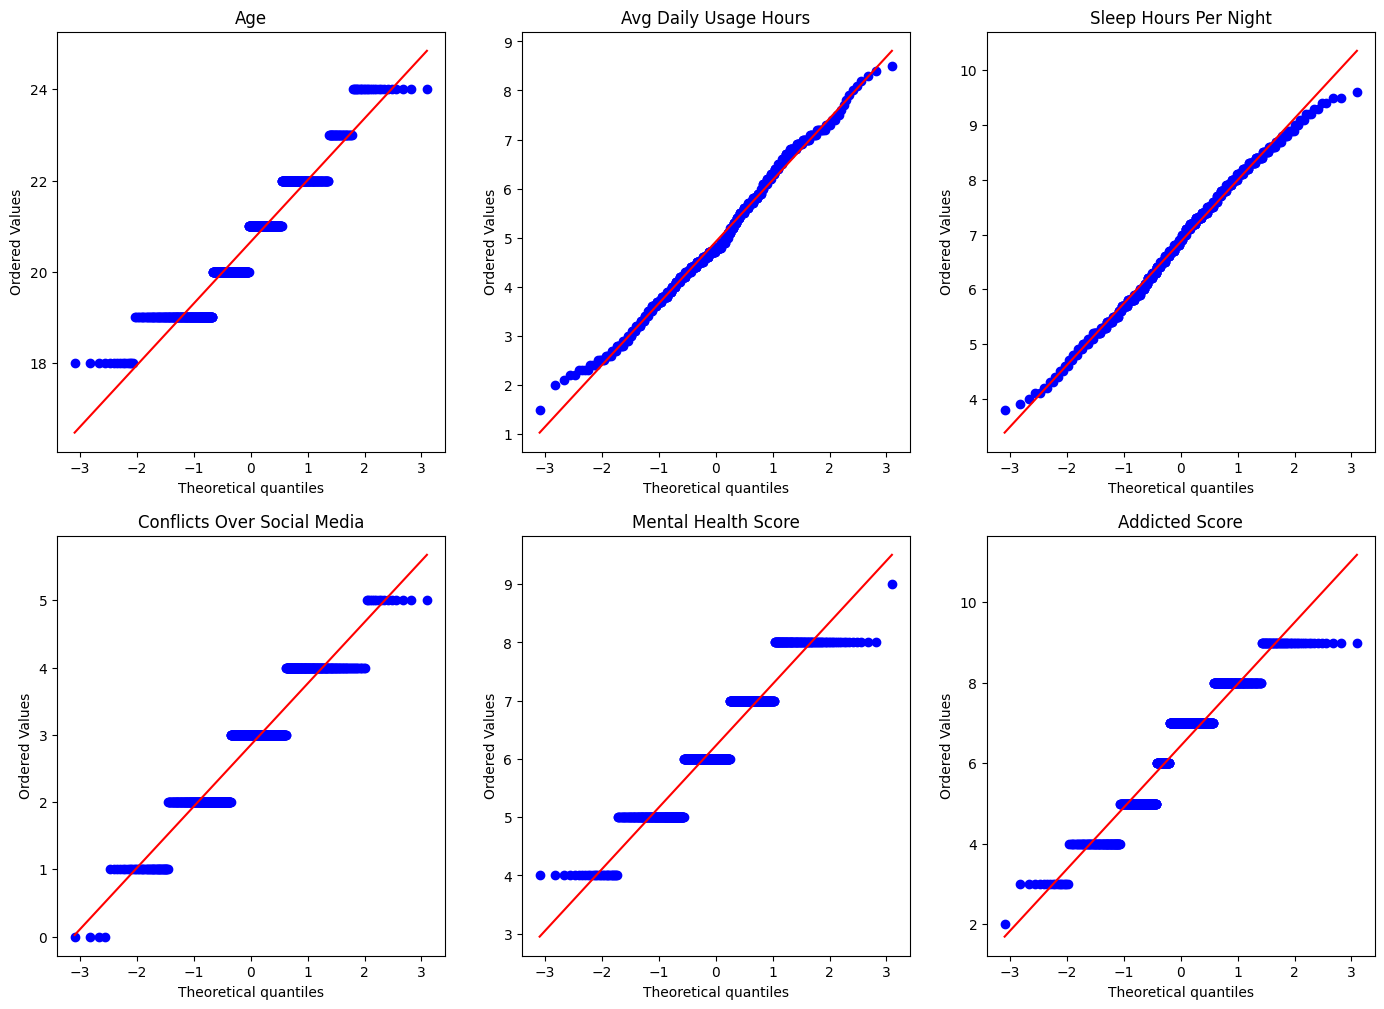

In [307]:
import scipy.stats as stats

# Create 2x3 subplot grid properly
fig, axes = plt.subplots(2, 3, figsize=(17, 12))

stats.probplot(data['Age'], dist = 'norm', plot = axes[0,0])
axes[0, 0].set_title('Age')

stats.probplot(data['Avg_Daily_Usage_Hours'], dist = 'norm', plot = axes[0,1])
axes[0, 1].set_title('Avg Daily Usage Hours')

stats.probplot(data['Sleep_Hours_Per_Night'], dist = 'norm', plot = axes[0,2])
axes[0, 2].set_title('Sleep Hours Per Night')

stats.probplot(data['Conflicts_Over_Social_Media'], dist = 'norm', plot = axes[1,0])
axes[1, 0].set_title('Conflicts Over Social Media')

stats.probplot(data['Mental_Health_Score'], dist = 'norm', plot = axes[1,1])
axes[1, 1].set_title('Mental Health Score')

stats.probplot(data['Addicted_Score'], dist = 'norm', plot = axes[1,2])
axes[1, 2].set_title('Addicted Score')
plt.show()

After plotting we understand that the some cols are normally distributed such as daily usage hours and sleep hours while some are not normally distributed such as age, mental health score and conflicts over social media. 

Now, let's check the values of the categorical columns to convert them into the numberical columns since machine cannot understand the string/text values. 

In [308]:
print(data['Academic_Level'].unique(), data['Academic_Level'].value_counts().unique(), "\n")
print(data['Most_Used_Platform'].unique(), data['Most_Used_Platform'].value_counts().unique(), "\n")
print(data['Relationship_Status'].unique(), data['Relationship_Status'].value_counts().unique())

['Undergraduate' 'Graduate' 'High School'] [353 325  27] 

['Instagram' 'Twitter' 'TikTok' 'YouTube' 'Facebook' 'LinkedIn' 'Snapchat'
 'LINE' 'KakaoTalk' 'VKontakte' 'WhatsApp' 'WeChat'] [249 154 123  54  30  21  15  13  12  10] 

['In Relationship' 'Single' 'Complicated'] [384 289  32]


Applying One-Hot encoding (using the pandas lib) and Label Encoding (using the replace method) to the Categorical features

In [309]:
# # One-Hot Encoding of Categorical Columns and Dropping Unnecessary Columns having multiple unique values
# data_one_hot = pd.get_dummies(data[['Academic_Level', 'Most_Used_Platform', 'Relationship_Status']], drop_first=False, dtype=int)
# data = pd.concat([data, data_one_hot], axis=1)
# data.drop(columns= ['Student_ID', 'Most_Used_Platform', 'Academic_Level', 'Relationship_Status'], inplace=True)
# data.info()

In [310]:
# # Label Encoding the Categorical columns to numerical values having only two unique values
# data = data.replace({'Gender': {'Male': 0, 'Female': 1}})
# data = data.replace({'Affects_Academic_Performance': {'No': 0, 'Yes': 1}})
# data.head()

Now, we will apply the encoding's using the sklearn library which are more efficient than using the pandas library for ohe and replace method for the label encoding. Here, we will apply the encodings after the train-test split.

In [311]:
#Importing the necessary libraries and methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ohe = OneHotEncoder(drop='first', dtype= np.int32, sparse_output=False)
le = LabelEncoder()

In [312]:
# Now, we will split the data into the train and test data to apply the feature encoding and feature scaling to the data 
X = data.drop(columns=['Addicted_Score'])
Y = data['Addicted_Score']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25, random_state= 42)

X_train.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media
371,22,Male,Graduate,3.5,Facebook,No,8.3,8,In Relationship,2
176,19,Female,Undergraduate,4.9,Facebook,No,7.5,7,Single,2
399,22,Male,Graduate,4.6,TikTok,Yes,7.6,6,Single,3
215,22,Male,Graduate,4.4,Facebook,No,8.8,7,In Relationship,2
568,19,Female,Undergraduate,7.4,WhatsApp,Yes,5.4,5,In Relationship,4


In [313]:
# # One Hot Encoder to get the actual feature names and preserve original indices.
# X_train_ohe = ohe.fit_transform(X_train[[ 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status']])
# X_test_ohe = ohe.transform(X_test[[ 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status']])

# cols_ohe = ohe.get_feature_names_out([ 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status'])

# X_train_ohe = pd.DataFrame(X_train_ohe, columns=cols_ohe, index=X_train.index)
# X_test_ohe = pd.DataFrame(X_test_ohe, columns=cols_ohe, index=X_test.index)

In [314]:
# # Use Label Encoder to get the Gender and Affects Academic Performance column to encode them
# cols_le = ['Gender', 'Affects_Academic_Performance']

# for col in cols_le:
#     X_train[col] = le.fit_transform(X_train[col])
#     X_test[col] = le.transform(X_test[col])

In [315]:
# # Dropping the older columns after the encoding has been done and concatenating the newer columns. 
# X_train = X_train.drop(columns=['Academic_Level', 'Most_Used_Platform', 'Relationship_Status'])
# X_test = X_test.drop(columns=['Academic_Level', 'Most_Used_Platform', 'Relationship_Status'])

# X_train = pd.concat([X_train, X_train_ohe], axis=1)
# X_test = pd.concat([X_test, X_test_ohe], axis=1)
# X_train.info()
# X_test.info()

Now, we will apply the encoding using the column Transformer to transform all the columns in a single go with the different types of the encoding methods and mathematical transformations. Let's apply mathematical transformations to the numerical columns to make them normal distributed and apply the encoding methods to the categorical columns to make them numerical columns. Here, we will use the ordinal encoder instead of the Label Encoder because Label encoder doesn't work with the column Transformer. Also, we will use the Function Transformer to apply the mathematical transformations.

In [316]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

log_trf = FunctionTransformer(np.log1p, feature_names_out='one-to-one')
sqrt_trf = FunctionTransformer(np.sqrt, feature_names_out='one-to-one')
# reci_trf = FunctionTransformer(np.reciprocal, feature_names_out='one-to-one') #This will work opposite in this case, we will ignore this

trfs_norm= [
    ('One Hot Encoding', ohe, ['Academic_Level', 'Most_Used_Platform', 'Relationship_Status']),
    ('Ordinal Encoding', oe, ['Gender', 'Affects_Academic_Performance']),
    ('Log Transformation', log_trf, ['Conflicts_Over_Social_Media']),
    ('Square Root Transformation', sqrt_trf, ['Mental_Health_Score', 'Age']) 
]

ct = ColumnTransformer(transformers= trfs_norm, remainder= 'passthrough', verbose_feature_names_out= False) # verbose_feature_names_out= False makes the transformation automatically a pandas dataframe

# Applying the Column Transformer to the data
X_train_trf_norm = ct.fit_transform(X_train) 
X_test_trf_norm = ct.transform(X_test) 

X_train_trf_norm = pd.DataFrame(X_train_trf_norm, columns=ct.get_feature_names_out())
X_test_trf_norm = pd.DataFrame(X_test_trf_norm, columns=ct.get_feature_names_out())

X_train_trf_norm.head()
X_test_trf_norm.head()

,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,...,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single,Gender,Affects_Academic_Performance,Conflicts_Over_Social_Media,Mental_Health_Score,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.098612,2.645751,4.472136,3.0,9.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.386294,2.449490,4.358899,4.8,5.7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.098612,2.645751,4.690416,2.9,7.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.386294,2.236068,4.358899,4.2,7.8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.693147,2.828427,4.690416,3.1,8.4


Let's check the normality for the transformed numerical features 

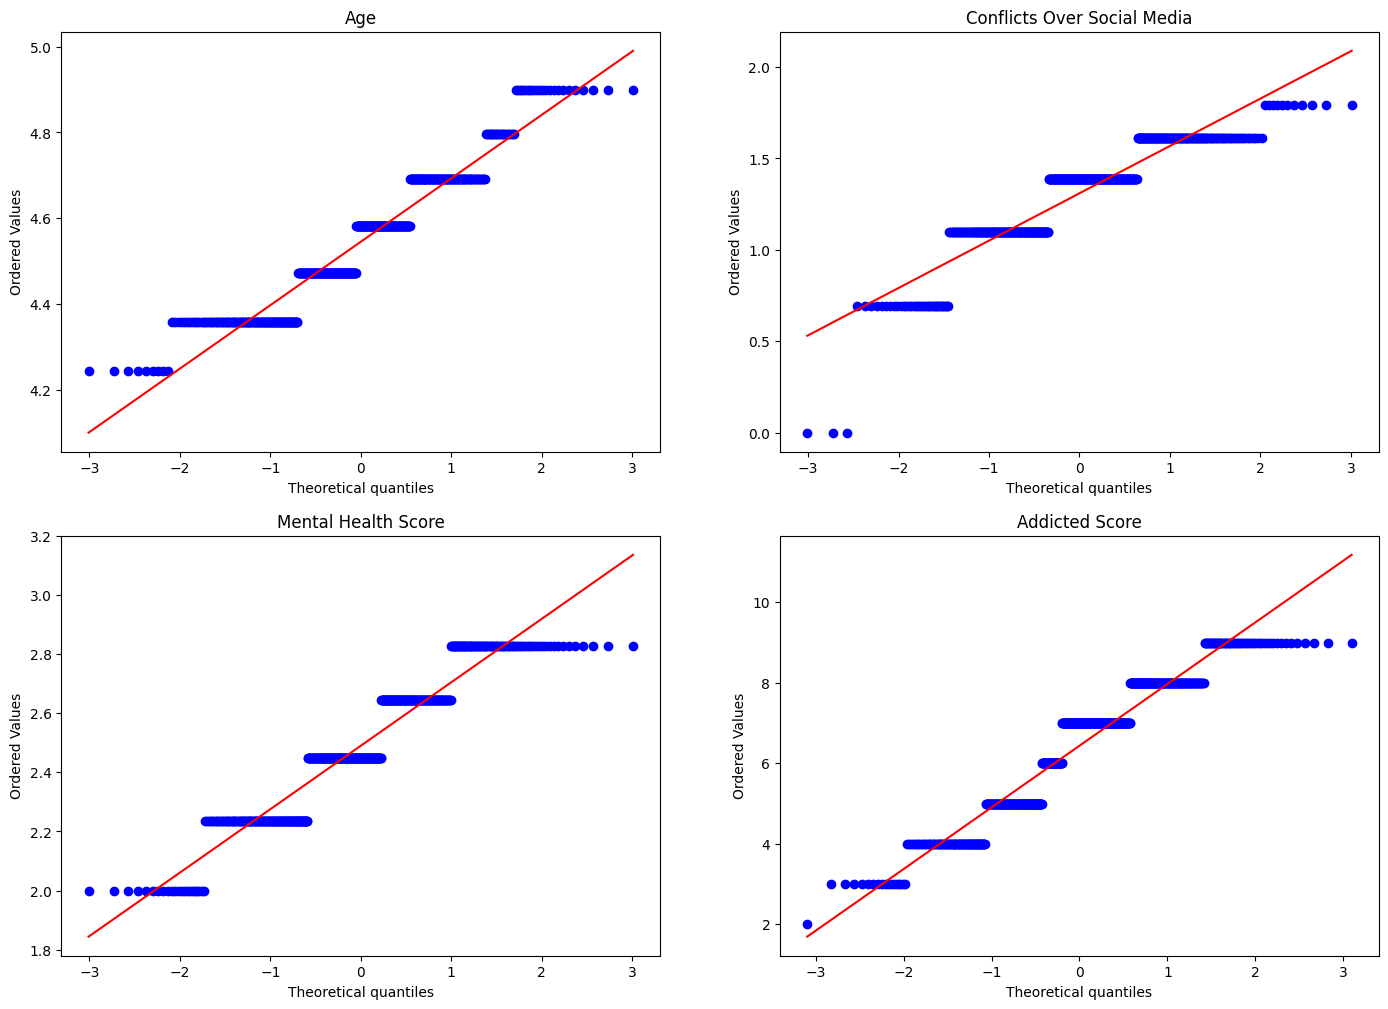

In [317]:
# Create 2x2 subplot grid properly
fig, axes = plt.subplots(2, 2, figsize=(17, 12))

stats.probplot(X_train_trf_norm['Age'], dist = 'norm', plot = axes[0,0])
axes[0, 0].set_title('Age')

stats.probplot(X_train_trf_norm['Conflicts_Over_Social_Media'], dist = 'norm', plot = axes[0,1])
axes[0, 1].set_title('Conflicts Over Social Media')

stats.probplot(X_train_trf_norm['Mental_Health_Score'], dist = 'norm', plot = axes[1,0])
axes[1, 0].set_title('Mental Health Score')

stats.probplot(data['Addicted_Score'], dist = 'norm', plot = axes[1,1])
axes[1, 1].set_title('Addicted Score')
plt.show()

Since, the normality is same after applying the mathematical transformations, now we will apply other tranformations method like box-cox and yeo-johnson to make them normally distributed. Here, we will use the Power Transformer to apply the transformations

In [318]:
from sklearn.preprocessing import PowerTransformer

pt_boxcox = PowerTransformer(method='box-cox')  
pt_yj = PowerTransformer()

trfs_pt= [
    ('Box-Cox Transformation', pt_boxcox, ['Age']),
    ('Yeo-Johnson Transformation', pt_yj, ['Mental_Health_Score', 'Conflicts_Over_Social_Media'])
]

ct = ColumnTransformer(transformers= trfs_pt, remainder= 'passthrough', verbose_feature_names_out= False) # verbose_feature_names_out= False makes the transformation automatically a pandas dataframe

# Applying the Column Transformer to the data
X_train_trf_norm_pt = ct.fit_transform(X_train_trf_norm) 
X_test_trf_norm_pt = ct.transform(X_test_trf_norm) 

X_train_trf_norm_pt = pd.DataFrame(X_train_trf_norm_pt, columns=ct.get_feature_names_out())
X_test_trf_norm_pt = pd.DataFrame(X_test_trf_norm_pt, columns=ct.get_feature_names_out())

X_train_trf_norm_pt.head()
X_test_trf_norm_pt.head()

,Age,Mental_Health_Score,Conflicts_Over_Social_Media,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,...,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single,Gender,Affects_Academic_Performance,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night
0,-0.423817,0.682521,-0.893005,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,9.0
1,-1.280700,-0.212128,0.166647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.8,5.7
2,0.971291,0.682521,-0.893005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.9,7.0
3,-1.280700,-1.129791,0.166647,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.2,7.8
4,0.971291,1.558907,-1.897532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1,8.4


Since after applying the box-cox and yeo-johnson, the normality doesn't changed. We will apply the Scaling methods to scale them 

3. Feature Scaling

we will use Max Absolute Scaler to scale all the Numerical features 

In [319]:
from sklearn.preprocessing import MaxAbsScaler

MAS = MaxAbsScaler()

trfs_mas= [
    ('MAS Transformation', MAS, ['Age', 'Mental_Health_Score', 'Conflicts_Over_Social_Media'])
]

ct = ColumnTransformer(transformers= trfs_mas, remainder= 'passthrough', verbose_feature_names_out= False) 

# Applying the Column Transformer to the data
X_train_trf_norm_mas = ct.fit_transform(X_train_trf_norm_pt) 
X_test_trf_norm_mas = ct.transform(X_test_trf_norm_pt) 

X_train_trf_norm_mas = pd.DataFrame(X_train_trf_norm_mas, columns=ct.get_feature_names_out())
X_test_trf_norm_mas = pd.DataFrame(X_test_trf_norm_mas, columns=ct.get_feature_names_out())

X_train_trf_norm_mas.head()
X_test_trf_norm_mas.head()

,Age,Mental_Health_Score,Conflicts_Over_Social_Media,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,...,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single,Gender,Affects_Academic_Performance,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night
0,-0.186327,0.328491,-0.333289,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,9.0
1,-0.563048,-0.102095,0.062196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.8,5.7
2,0.427019,0.328491,-0.333289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.9,7.0
3,-0.563048,-0.543758,0.062196,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.2,7.8
4,0.427019,0.750287,-0.708199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1,8.4


Let's check the normality for the transformed numerical features

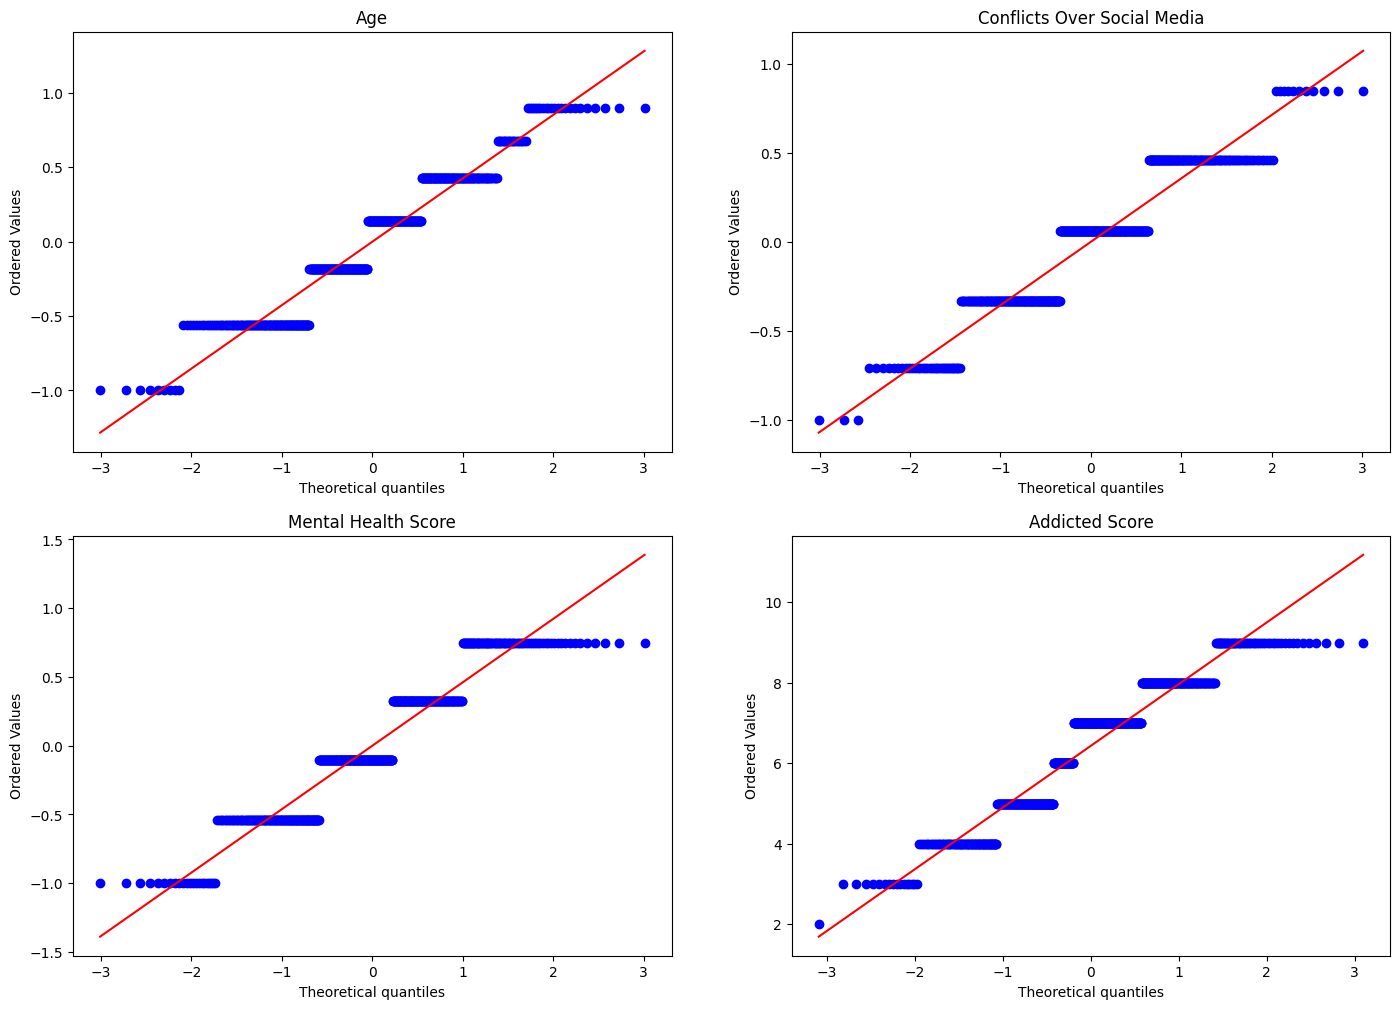

In [320]:
# Create 2x2 subplot grid properly
fig, axes = plt.subplots(2, 2, figsize=(17, 12))

stats.probplot(X_train_trf_norm_mas['Age'], dist = 'norm', plot = axes[0,0])
axes[0, 0].set_title('Age')

stats.probplot(X_train_trf_norm_mas['Conflicts_Over_Social_Media'], dist = 'norm', plot = axes[0,1])
axes[0, 1].set_title('Conflicts Over Social Media')

stats.probplot(X_train_trf_norm_mas['Mental_Health_Score'], dist = 'norm', plot = axes[1,0])
axes[1, 0].set_title('Mental Health Score')

stats.probplot(data['Addicted_Score'], dist = 'norm', plot = axes[1,1])
axes[1, 1].set_title('Addicted Score')
plt.show()

Even after applying the Scaling, the features don't get normalized. This happened due to the fact that these features are the discrete numerical features. Discrete Numerical features have the discrete values rather than the continous values and hence they can never be normalized because even after the scalings and transformations they will have the same skewness and normalisations, hence it is better to leave them as it is and use the models which dont assume them to be normalised like trees based models.